In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans 

In [89]:
df = pd.read_csv("../DataSets/Wine.csv")

In [90]:
df.shape

(178, 14)

In [91]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [92]:
df.isna().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [93]:
df.drop_duplicates(inplace=True)

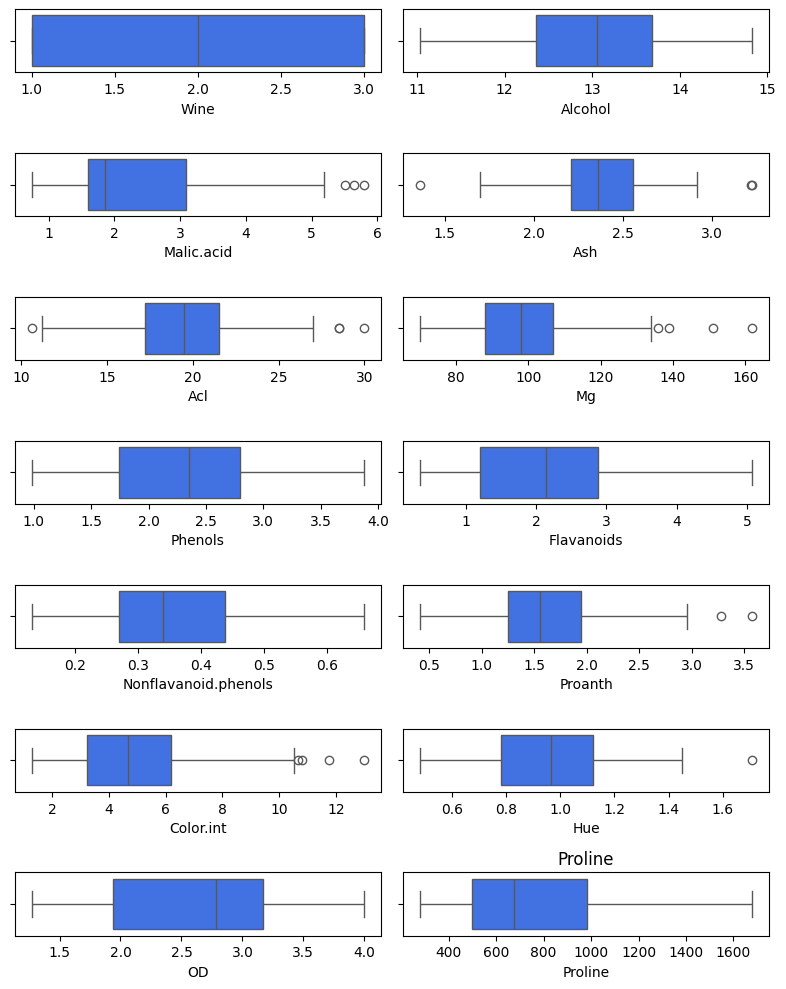

In [94]:
columns = np.array(df.columns).reshape(7,2)
def find_outlier_with_box_plot():
    fig,ax = plt.subplots(7,2,figsize=(8, 10))
    for i in range(7):
        for j in range(2):
            sns.boxplot(df,x=columns[i][j],ax=ax[i,j],color="#2868fc")
            plt.title(columns[i][j])
    plt.tight_layout()
    plt.show()
find_outlier_with_box_plot()

In [95]:
df.drop(df[df['Malic.acid']>5].index,inplace=True)
df.drop(df[df['Ash']>3].index,inplace=True)
df.drop(df[df['Ash']<1.8].index,inplace=True)
df.drop(df[df['Acl']>27].index,inplace=True)
df.drop(df[df['Mg']>135].index,inplace=True)
df.drop(df[df['Proanth']>2.75].index,inplace=True)
df.drop(df[df['Hue']>1.5].index,inplace=True)

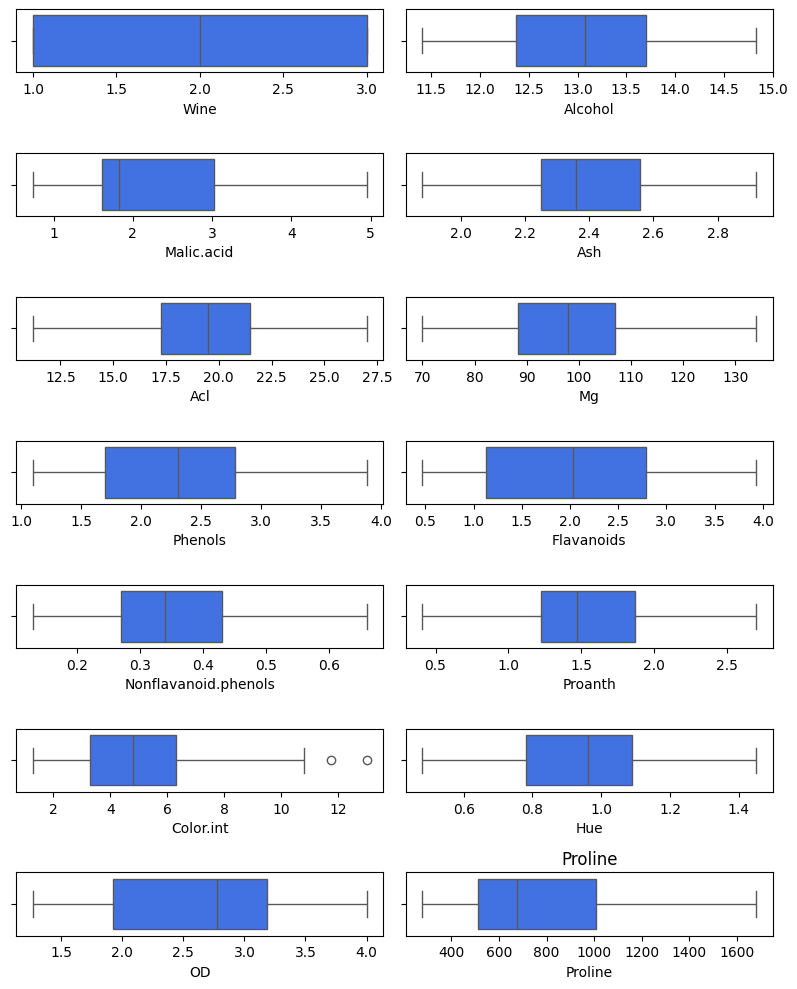

In [96]:
find_outlier_with_box_plot()

In [97]:
df.shape

(154, 14)

In [ ]:
df.skew()

Wine                    0.117510
Alcohol                -0.085413
Malic.acid              0.842699
Ash                    -0.017445
Acl                     0.162411
Mg                      0.442116
Phenols                 0.164494
Flavanoids             -0.037260
Nonflavanoid.phenols    0.462257
Proanth                -0.007327
Color.int               0.857763
Hue                    -0.132755
OD                     -0.264033
Proline                 0.735510
dtype: float64

<Axes: >

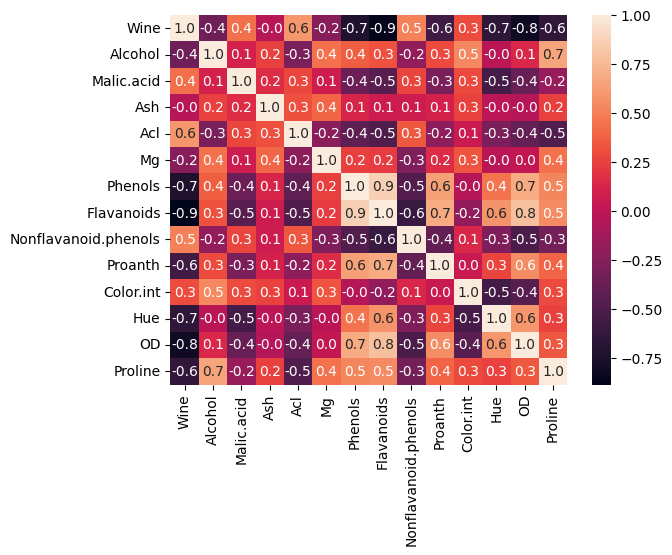

In [ ]:
sns.heatmap(df.corr(),annot=True,fmt="0.1f")


In [108]:
df_new= df[["Phenols","Flavanoids","OD"]]

In [114]:
x_train,x_test,y_train,y_test = train_test_split(df.drop("Wine",axis=1),df["Wine"],random_state=42,test_size=0.1)